In [1]:
# import libraries
import time
import random
import pandas as pd
import numpy as np
import collections, numpy
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from urllib.request import urlopen

import warnings;
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
# import dataset
df= pd.read_csv('QualityPrediction.csv')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# drop first column
#df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
# check if there is null value in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# check if there is duplicate value in dataset
df.duplicated().sum()

240

In [7]:
# remove duplicate values
df=df.drop_duplicates()

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
# check if there is duplicate value in dataset
df.duplicated().sum()

0

In [9]:
# Get summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# check unique values in each column
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [11]:
# check unique values for depedent column- 'quality'
df.quality.sort_values(ascending= True).unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

# Data Visualization

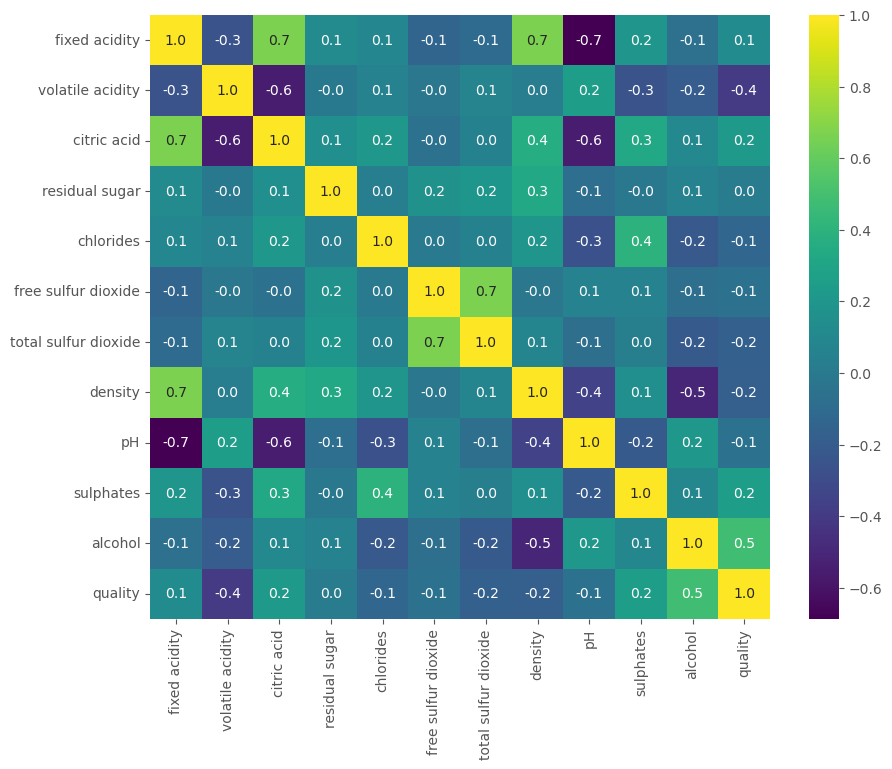

In [12]:
# Correlation
correlation= df.corr()

# Construct a heatmap to understand relationship between columns
plt.figure(figsize = (10,8), dpi = 100)
sns.heatmap(correlation, fmt ='.1f', annot = True, cmap ='viridis')
plt.show()

In [13]:
features = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [14]:
features.shape

(1359, 11)

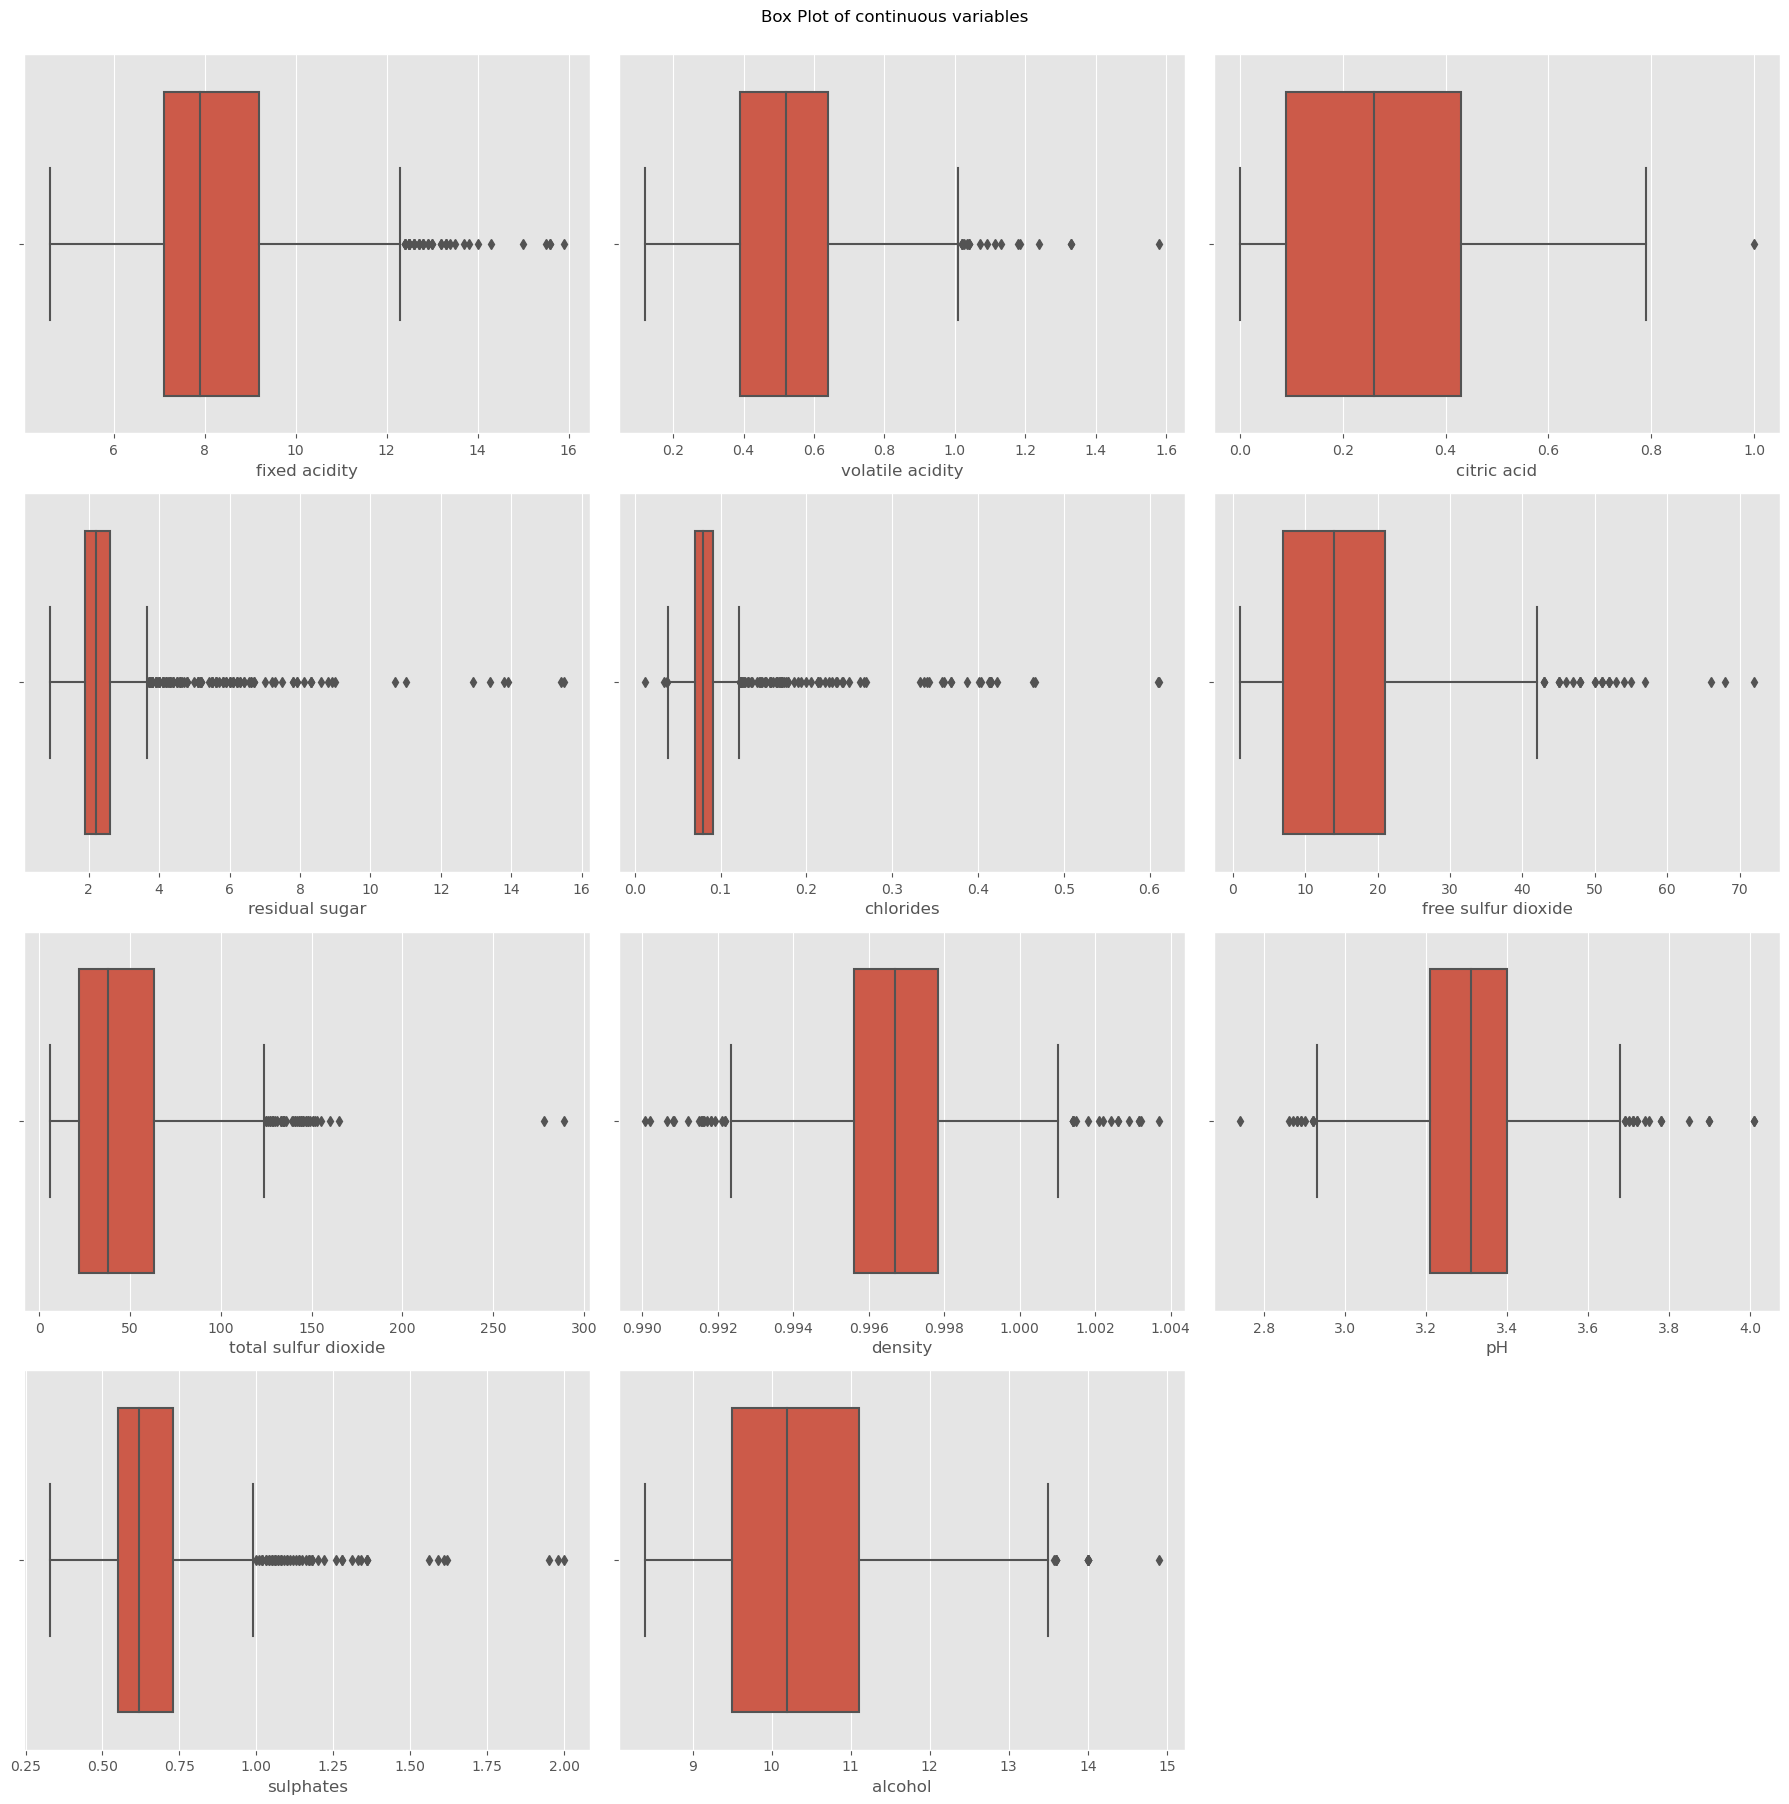

In [15]:
# plot boxplot
plt.figure(figsize=(18, 18), dpi = 100)
for i, col in enumerate(features):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data = df, x = col, ax = ax)
plt.suptitle('Box Plot of continuous variables', y = 1.00)
plt.tight_layout()

From boxplot, it is observed that each column has outliers. Outliers can be removes using IQR method. Howerver, prediction capacity of model will reduce if we remove outlier. Therefore, outliers are kept as it is.

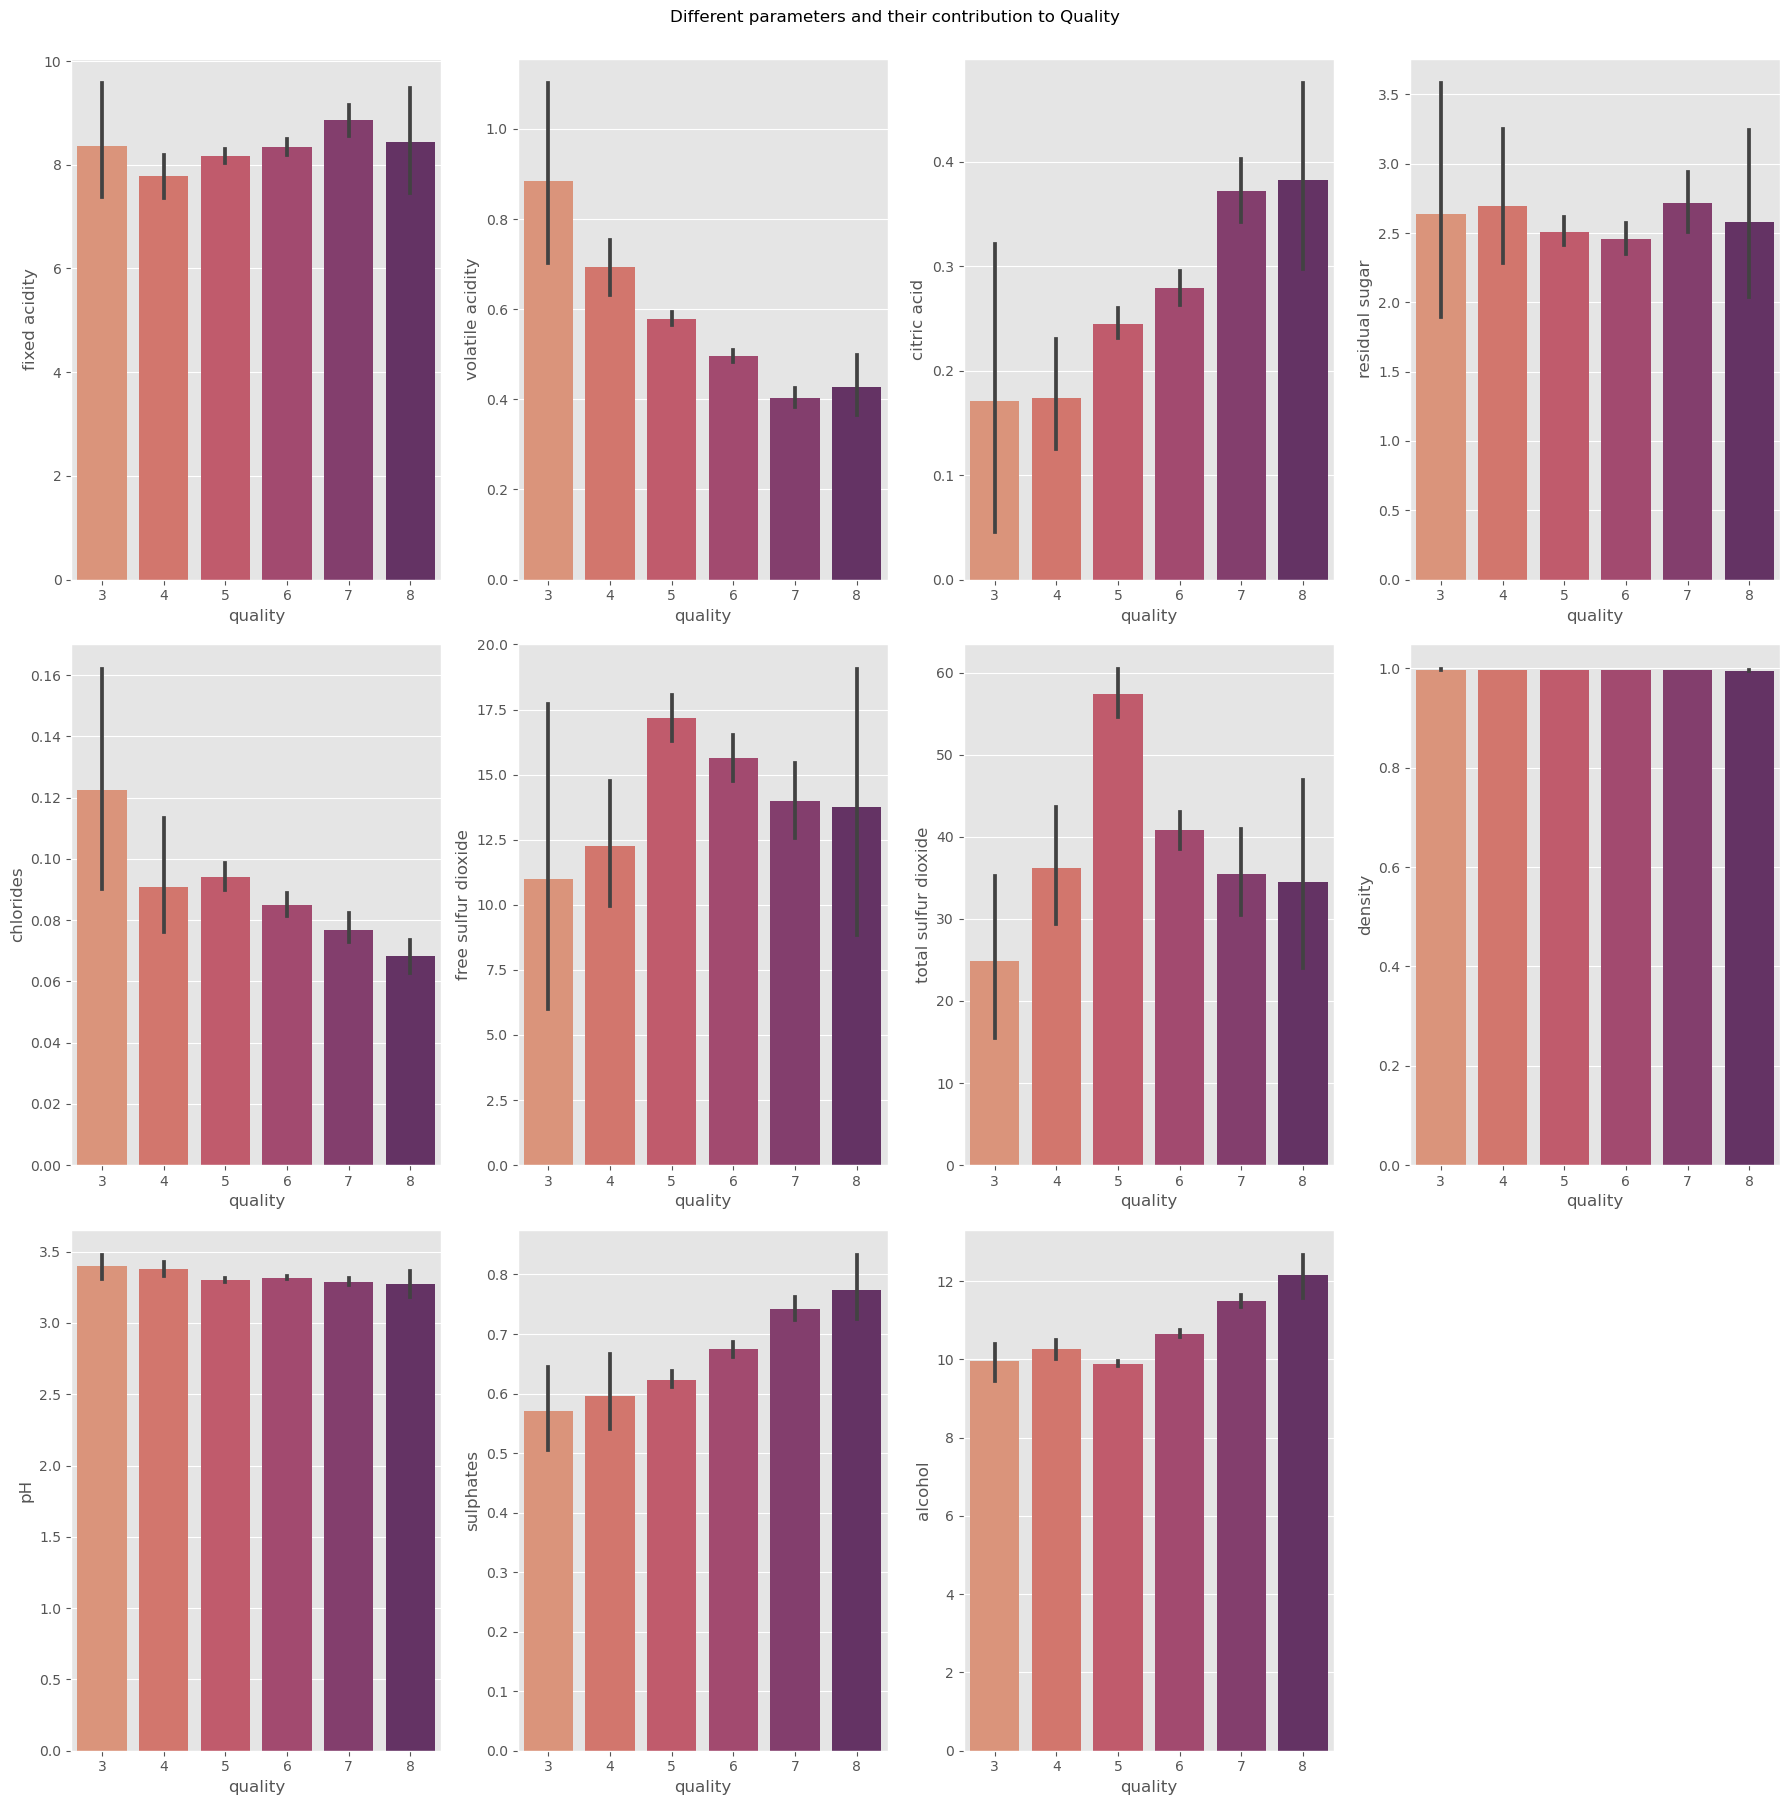

In [16]:
# Using barplot, contribution of each column to quality of wine is observed

plt.figure(figsize=(18, 18), dpi = 100)

for i, col in enumerate(features):
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data = df,x = 'quality', y = col, ax = ax, palette='flare')
plt.suptitle('Different parameters and their contribution to Quality', y = 1.00)
plt.tight_layout()

From correlation matrix and barplot, it is observed that increase in alcohol increases quality of wine. Also, decrease in volatile quality increases quality of wine.

3     10
8     17
4     53
7    167
6    535
5    577
Name: quality, dtype: int64



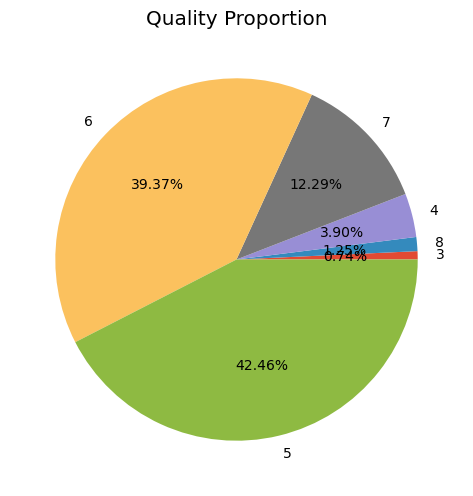

In [17]:
# Find percentage of values in dependant column

quality_score_count = df.quality.value_counts().sort_values(ascending = True)
print(quality_score_count, end = "\n\n")

# plotting a pie chart for the same
plt.figure(figsize = (8,6), dpi = 100)
plt.pie(quality_score_count,autopct = "%.2f%%", labels = quality_score_count.index)
plt.title("Quality Proportion")

plt.show()

<Figure size 600x800 with 0 Axes>

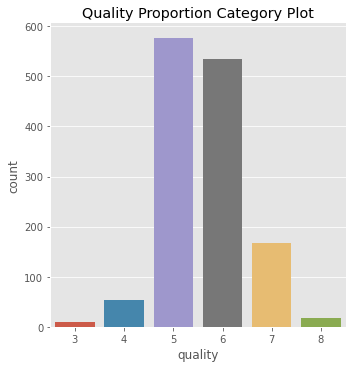

In [18]:
# plotting the same thing with the help of a bar-plot
plt.figure(figsize = (6,8), dpi = 100)
sns.catplot(x = 'quality', data = df, kind = 'count')
plt.title("Quality Proportion Category Plot")
plt.show()

# 1. Logistic regression

In [19]:
# import libraries

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [20]:
# assigning features/parameters to X

X = df.drop('quality', axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [21]:
# assigning target value to y
df['best quality'] = [1 if x > 6 else 0 for x in df['quality']]
y = df['best quality']
y.head()

0    0
1    0
2    0
3    0
5    0
Name: best quality, dtype: int64

In [22]:
y.value_counts()

0    1175
1     184
Name: best quality, dtype: int64

In [23]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

# printing shapes y, y_train and y_test
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1359, 11) (1359,) (1087, 11) (1087,) (272, 11) (272,)


In [24]:
# Instantiating and fitting model to training dataset

log_reg= LogisticRegression(random_state= 50)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=50)

In [25]:
# Predicting for test dataset

y_test_predictions= log_reg.predict(X_test)

In [26]:
# Actual Vs Predicted

print(f"Actual :- \n{y_test.value_counts()}", end = "\n\n")
print(f"Predicted :- \n{collections.Counter(y_test_predictions)}")

Actual :- 
0    237
1     35
Name: best quality, dtype: int64

Predicted :- 
Counter({0: 262, 1: 10})


1 means quality>6 and 
0 means quality<6

In [27]:
# Confustion matrix

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_predictions)
conf_matrix

array([[233,   4],
       [ 29,   6]], dtype=int64)

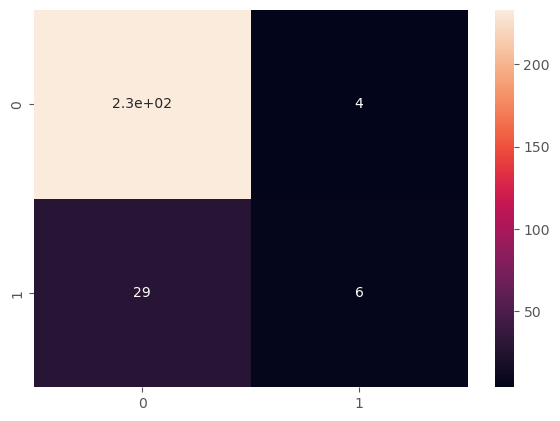

In [28]:
# Plot confustion matrix

plt.figure(figsize = (7,5), dpi = 100)
sns.heatmap(conf_matrix, annot = True)
plt.show()

TN=233, TP=6, FP=4, FN=1

In [29]:
# Calculate Accuracy, Precision, Recall

print("Accuracy : ", '%.2f' %metrics.accuracy_score(y_test,y_test_predictions))
print("Misclassification :", '%.2f' % (1 - metrics.accuracy_score(y_test,y_test_predictions)))
print("Precision : ", '%.2f' %metrics.precision_score(y_test,y_test_predictions))
print("Recall : ", '%.2f' %metrics.recall_score(y_test,y_test_predictions))
print("f1 Score :", '%.2f' %metrics.f1_score(y_test,y_test_predictions))

Accuracy :  0.88
Misclassification : 0.12
Precision :  0.60
Recall :  0.17
f1 Score : 0.27


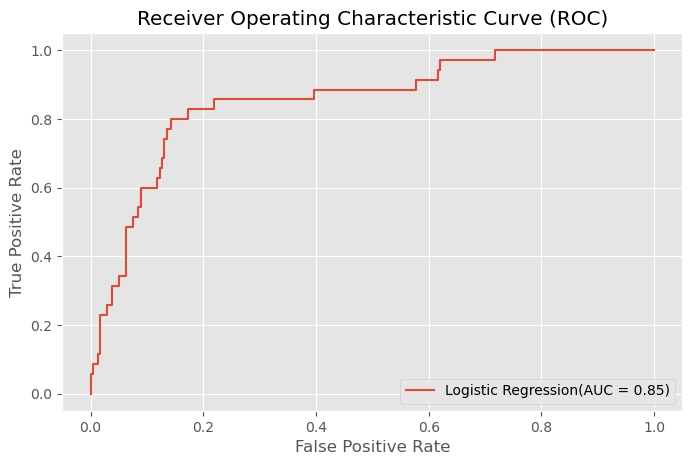

In [30]:
# ROC and AUC

# This will predict the probabilities

y_pred_proba = log_reg.predict_proba(X_test)[::,1]

# ROC curve function
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# finding Area Under the Curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting
plt.figure(figsize=(8,5), dpi = 100)
plt.plot(fpr, tpr, label = "Logistic Regression(AUC = %.2f)" %auc)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = 4)
plt.show()

# 2. Decision Tree

In [31]:
# import libraries

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [32]:
wine_dt = pd.read_csv('QualityPrediction.csv')
df_dt = wine_dt.drop_duplicates()

In [33]:
# assigning features/parameters to X
X = df_dt.drop('quality', axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [34]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [35]:
X.duplicated().sum()

0

In [36]:
wine_dt.duplicated().sum()

240

In [37]:
df_dt.duplicated().sum()

0

In [38]:
# assigning target value to y

df_dt['best quality'] = [1 if x > 6 else 0 for x in df['quality']]
y = df_dt['best quality']
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: best quality, Length: 1359, dtype: int64

In [39]:
# splitting data into train and test datasets

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.2, random_state = 1)

# printing shapes y, y_train and y_test
print(X.shape, y.shape, X_train_dt.shape, y_train_dt.shape, X_test_dt.shape, y_test_dt.shape)

(1359, 11) (1359,) (1087, 11) (1087,) (272, 11) (272,)


Decision tree with depth 2 and criteria='gini'

In [40]:
# Instantiating and fitting the model to training Dataset
decision_tree_d2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)

# fitting
decision_tree_d2.fit(X_train_dt,y_train_dt)

# checking the training score
decision_tree_d2_train_score = (decision_tree_d2.score(X_train_dt,y_train_dt))*100

# checking the testing score
decision_tree_d2_test_score = (decision_tree_d2.score(X_test_dt,y_test_dt))*100

print('Training Score :', '%.2f' %decision_tree_d2_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d2_test_score, '%')

Training Score : 88.68 %
Testing Score:  89.71 %


Decision tree with depth 2

In [41]:
# Instantiating and fitting the model to training Dataset
decision_tree_d4 = DecisionTreeClassifier(random_state = 1, max_depth = 4)

# fitting
decision_tree_d4.fit(X_train_dt,y_train_dt)

# checking the training score
decision_tree_d4_train_score = (decision_tree_d4.score(X_train_dt,y_train_dt))*100

# checking the testing score
decision_tree_d4_test_score = (decision_tree_d4.score(X_test_dt,y_test_dt))*100

print('Training Score :', '%.2f' %decision_tree_d4_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d4_test_score, '%')

Training Score : 90.43 %
Testing Score:  90.07 %


Decision tree with depth 6

In [42]:
# Instantiating and fitting the model to training Dataset
decision_tree_d6 = DecisionTreeClassifier(random_state = 1, max_depth = 6)

# fitting
decision_tree_d6.fit(X_train_dt,y_train_dt)

# checking the training score
decision_tree_d6_train_score = (decision_tree_d6.score(X_train_dt,y_train_dt))*100

# checking the testing score
decision_tree_d6_test_score = (decision_tree_d6.score(X_test_dt,y_test_dt))*100

print('Training Score :', '%.2f' %decision_tree_d6_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d6_test_score, '%')

Training Score : 94.85 %
Testing Score:  88.24 %


Decision tree with depth 8

In [44]:
# Instantiating and fitting the model to training Dataset
decision_tree_d8 = DecisionTreeClassifier(random_state = 1, max_depth = 8)

# fitting
decision_tree_d8.fit(X_train_dt,y_train_dt)

# checking the training score
decision_tree_d8_train_score = (decision_tree_d8.score(X_train_dt,y_train_dt))*100

# checking the testing score
decision_tree_d8_test_score = (decision_tree_d8.score(X_test_dt,y_test_dt))*100

print('Training Score :', '%.2f' %decision_tree_d8_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d8_test_score, '%')

Training Score : 97.98 %
Testing Score:  86.40 %


Decision tree with depth 8 and criterion = 'entropy'

In [45]:
# Instantiating and fitting the model to training Dataset
decision_tree_entropy = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')

# fitting
decision_tree_entropy.fit(X_train_dt,y_train_dt)

y_pred_dt = decision_tree_entropy.predict_proba(X_test_dt)[:,1]

# checking the training score
decision_tree_entropy_train_score = (decision_tree_entropy.score(X_train_dt,y_train_dt))*100
print('Training Score :', '%.2f' %decision_tree_entropy_train_score, '%')

# checking the testing score
decision_tree_entropy_test_scoret = (decision_tree_entropy.score(X_test_dt,y_test_dt))*100
print('Testing Score :','%.2f' %decision_tree_entropy_test_scoret, '%')

Training Score : 86.02 %
Testing Score : 88.24 %


Conclusion- Decision tree with depth 4 and criteria gini gives best accuracy rate.

In [51]:
# prediction for test dataset
y_predictions_dt = decision_tree_d4.predict(X_test_dt)

# testing score
print('Test Score : ','%.2f' %decision_tree_d4.score(X_test_dt,y_test_dt))

Test Score :  0.90


Confusion matrix

In [52]:
print(confusion_matrix(y_test_dt, y_predictions_dt))

[[232   8]
 [ 19  13]]


In [53]:
def create_conf_mat(y_test_dt, y_predictions_dt):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test_dt.shape) != len(y_predictions_dt.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test_dt.shape != y_predictions_dt.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test_dt,
                                        columns = y_predictions_dt)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

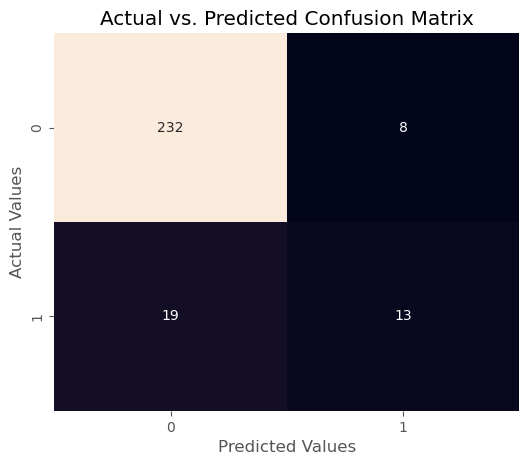

In [54]:
plt.figure(figsize = (6,5), dpi = 100)
conf_mat = create_conf_mat(y_test_dt, y_predictions_dt)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

TN=232, TP=13, FP=8, FN=19

In [56]:
print("Accuracy : ", '%.2f' %metrics.accuracy_score(y_test_dt,y_predictions_dt))
print("Misclassification :", '%.2f' % (1 - metrics.accuracy_score(y_test_dt,y_predictions_dt)))
print("Precision : ", '%.2f' %metrics.precision_score(y_test_dt,y_predictions_dt))
print("Recall : ", '%.2f' %metrics.recall_score(y_test_dt,y_predictions_dt))
print("f1 Score :", '%.2f' %metrics.f1_score(y_test_dt,y_predictions_dt))

Accuracy :  0.90
Misclassification : 0.10
Precision :  0.62
Recall :  0.41
f1 Score : 0.49


ROC

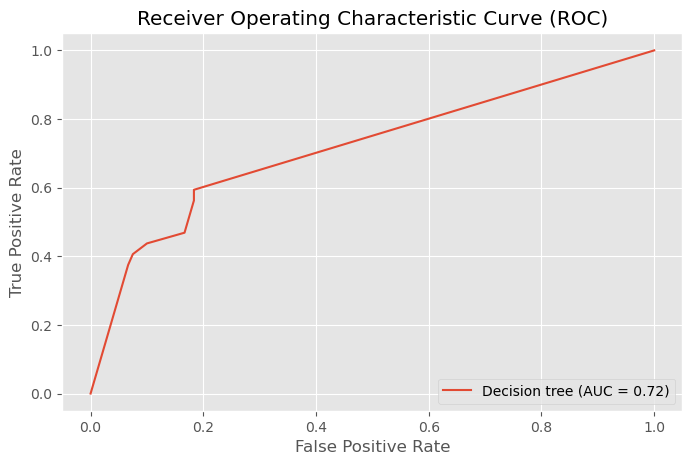

In [83]:
# ROC and AUC

# This will predict the probabilities

y_pred_proba = decision_tree_d8.predict_proba(X_test_dt)[::,1]

# ROC curve function
fpr, tpr, _ = metrics.roc_curve(y_test_dt,  y_pred_proba)

# finding Area Under the Curve
auc = metrics.roc_auc_score(y_test_dt, y_pred_proba)

# plotting
plt.figure(figsize=(8,5), dpi = 100)
plt.plot(fpr, tpr, label = "Decision tree (AUC = %.2f)" %auc)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = 4)
plt.show()

# 3. Random Forest

In [61]:
wine_rf = pd.read_csv('QualityPrediction.csv')
df_rf = wine_rf.drop_duplicates()

In [62]:
# assigning features/parameters to X
X = df_rf.drop('quality', axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [63]:
# assigning target value to y
df_rf['best quality'] = [1 if x > 6 else 0 for x in df['quality']]
y = df_rf['best quality']

In [64]:
# splitting data into train and test datasets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.2, random_state = 5)

# printing shapes y, y_train and y_test
print(y.shape, y_train_rf.shape, y_test_rf.shape)

(1359,) (1087,) (272,)


In [65]:
model = RandomForestClassifier(random_state = 40)

Hyper Parameter tuning using GridSearchCV

In [66]:
# setting a seed
np.random.seed(40)

# this will record the time
start = time.time()

# gridsearch will use each parameter for prediction
param_distribution = {'max_depth':[2,3,4,5],
                     'bootstrap':[True,False],
                     'max_features':['auto','sqrt','log2', None],
                     'criterion':['gini','entropy']}

# using gridsearch to find the best possible combination out of param_distrbution
model_rf = GridSearchCV(model, cv = 10, param_grid = param_distribution, n_jobs = 3)
model_rf.fit(X_train_rf,y_train_rf)

print('Best Parameters using Grid search :- \n', model_rf.best_params_)
end = time.time()
print('Time taken in grid search :- %0.2f'%(end-start))

Best Parameters using Grid search :- 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
Time taken in grid search :- 45.60


In [67]:
model.set_params(criterion = 'gini', max_features = 'auto', max_depth = 5)

RandomForestClassifier(max_depth=5, random_state=40)

Actual Vs Predictions

In [68]:
# flatten y_test
y_test_actual = y_test_rf.values.ravel()

In [71]:
y_test_rf.shape

(272,)

In [70]:
y_test_actual.shape

(272,)

In [69]:
model_predictions = model_rf.predict(X_test_rf)

In [72]:
print(f" Actual : \n\n{y_test_actual}", end ="\n\n")
print(f" Predicted : \n\n {model_predictions}")

 Actual : 

[1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0]

 Predicted : 

 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Confusion Matrix

In [73]:
def create_conf_mat(y_test_rf, model_predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test_rf.shape) != len(model_predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test_rf.shape != model_predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test_rf,
                                        columns = model_predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

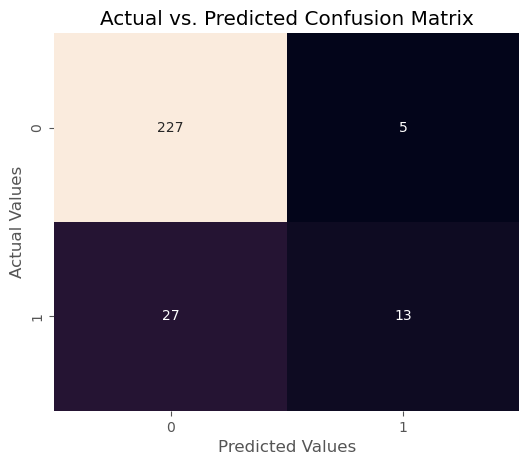

In [74]:
plt.figure(figsize = (6,5), dpi = 100)
conf_mat = create_conf_mat(y_test_rf, model_predictions)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

TN=227, TP=13, FP=5, FN=27

In [76]:
print(confusion_matrix(y_test_rf, model_predictions))

[[227   5]
 [ 27  13]]


In [79]:
# accuracy rate
model_accuracy = (model_rf.score(X_test_rf, y_test_rf))*100
print("Accuracy of our model is %0.2f" %model_accuracy, '%')

# error rate
model_error = 100 - model_accuracy
print("Error rate of our model is %.2f" %model_error, '%')

# for calculating predictions
predictions_prob = model_rf.predict_proba(X_test_rf)[:, 1]

# roc_curve function
fpr_model_rf, tpr_model_rf, _ = roc_curve(y_test_rf, predictions_prob, pos_label = 1)

# calculating auc
#auc_model_rf = auc(fpr_model_rf, tpr_model_rf) 

Accuracy of our model is 88.24 %
Error rate of our model is 11.76 %


Classification Report

In [80]:
def print_class_report(predictions, alg_name):
    """
     Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn.
    """
    
    print('Classification Report for %s: '%alg_name)
    print(classification_report(predictions, y_test_rf))

In [81]:
class_report = print_class_report(model_predictions,'Random Forest')

Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       254
           1       0.33      0.72      0.45        18

    accuracy                           0.88       272
   macro avg       0.65      0.81      0.69       272
weighted avg       0.94      0.88      0.90       272



ROC

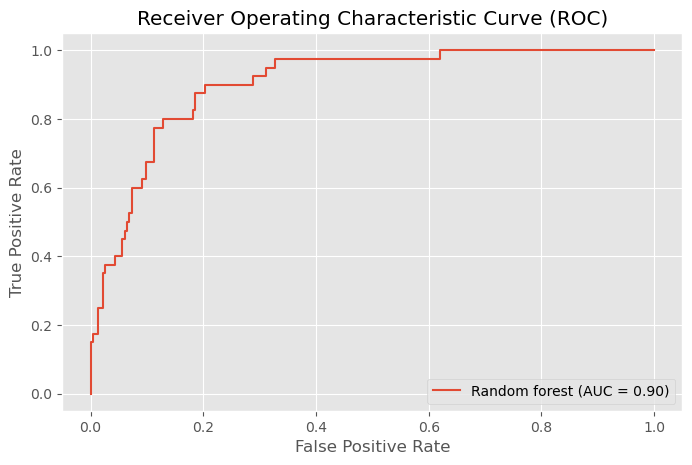

In [86]:
# ROC and AUC

# This will predict the probabilities

y_pred_proba = model_rf.predict_proba(X_test_rf)[::,1]

# ROC curve function
fpr, tpr, _ = metrics.roc_curve(y_test_rf,  y_pred_proba)

# finding Area Under the Curve
auc = metrics.roc_auc_score(y_test_rf, y_pred_proba)

# plotting
plt.figure(figsize=(8,5), dpi = 100)
plt.plot(fpr, tpr, label = "Random forest (AUC = %.2f)" %auc)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = 4)
plt.show()